In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


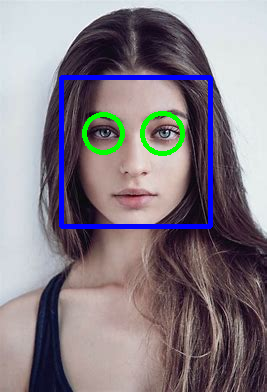

In [6]:
 from google.colab.patches import cv2_imshow
# face and eye detection in an image
import cv2

# Load the Haar cascade classifier for face and eye detection
face_cascade=cv2.CascadeClassifier(r"/content/drive/MyDrive/face_eye_detection/haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier(r'/content/drive/MyDrive/face_eye_detection/haarcascade_eye.xml')

# Load the image
img=cv2.imread(r"/content/drive/MyDrive/face_eye_detection/single.jpg")

# convert image to grayscale
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# detect faces in grayscale image
faces=face_cascade.detectMultiScale(gray,1.1,5)

# draw rectangles around the detected faces
for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)

    # Extract the region of interest (ROI) for eye detection
    roi_gray = gray[y:y+h, x:x+w]

    #detect eye within each face region
    eyes = eye_cascade.detectMultiScale(roi_gray,1.1,5)
    for (ex, ey, ew, eh) in eyes:
        center=(x+ex+ew//2,y+ey+eh//2)
        radius=ew//2
        cv2.circle(img,center,radius,(0,255,0),4)

# display the face detected image
cv2_imshow(img)
